In [7]:
import pandas as pd
data=pd.read_csv("customer_dataset.csv", sep = ",")

In [8]:
from funpymodeling.exploratory import freq_tbl, status, profiling_num

In [9]:
data

,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAddressSimplified,sameCity
0,18.0,pending,True,card,JCB 16 digit,Citizens First Banks,18,False,False,com,yahoo,only_letters,yes
1,26.0,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,26,False,True,com,yahoo,only_letters,no
2,45.0,fulfilled,False,card,VISA 16 digit,Vertex Bancorp,45,False,False,com,yahoo,digits_and_letters,no
3,23.0,fulfilled,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,23,False,False,com,yahoo,digits_and_letters,no
4,43.0,fulfilled,False,card,Mastercard,Vertex Bancorp,43,True,True,com,other,only_letters,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,NaN,NaN,NaN,NaN,NaN,NaN,25,True,NaN,weird,weird,only_letters,unknown
619,NaN,NaN,NaN,NaN,NaN,NaN,25,True,NaN,weird,weird,only_letters,unknown
620,NaN,NaN,NaN,NaN,NaN,NaN,25,False,NaN,weird,weird,only_letters,unknown
621,NaN,NaN,NaN,NaN,NaN,NaN,19,False,NaN,weird,weird,only_letters,unknown


In [10]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


In [11]:
##data.dropna(subset=['fraudulent'], inplace=True)

In [12]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


In [13]:
freq_tbl(data.paymentMethodType)

,paymentMethodType,frequency,percentage,cumulative_perc
0,card,242,0.388443,0.707602
1,apple pay,36,0.057785,0.812865
2,paypal,36,0.057785,0.918129
3,bitcoin,28,0.044944,1.000000


In [14]:
freq_tbl(data.fraudulent)

,fraudulent,frequency,percentage,cumulative_perc
0,False,107,0.171750,0.636905
1,True,61,0.097913,1.000000


In [15]:
t_coutry = freq_tbl(data.paymentMethodType)
t_coutry.query('frequency<=30')['paymentMethodType']

3    bitcoin
Name: paymentMethodType, dtype: object

In [16]:
data['fraudulent'] 

0      False
1       True
2      False
3      False
4       True
       ...  
618      NaN
619      NaN
620      NaN
621      NaN
622      NaN
Name: fraudulent, Length: 623, dtype: object

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
orderAmount,478.0,35.606695,21.667298,10.0,22.0,35.0,46.0,353.0
transactionAmount,623.0,34.598716,20.360247,10.0,21.0,34.0,45.0,353.0


In [18]:
conteo_categorias = data['transactionFailed'].value_counts()
print(conteo_categorias)

transactionFailed
False    455
True     168
Name: count, dtype: int64


In [19]:
conteo_categorias = data['fraudulent'].value_counts()
print(conteo_categorias)

fraudulent
False    107
True      61
Name: count, dtype: int64


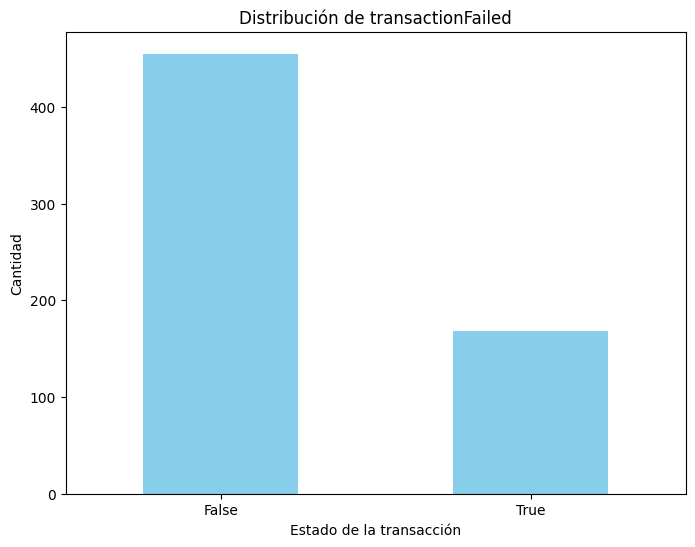

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data['transactionFailed'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de transactionFailed')
plt.xlabel('Estado de la transacción')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

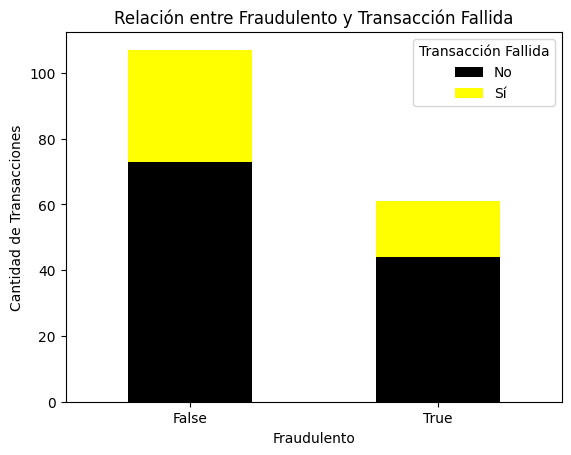

In [21]:
contingency_table = pd.crosstab(data['fraudulent'], data['transactionFailed'])

# Crear un gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, color=['black', 'yellow'])
plt.title('Relación entre Fraudulento y Transacción Fallida')
plt.xlabel('Fraudulento')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=0)
plt.legend(title='Transacción Fallida', labels=['No', 'Sí'])
plt.show()

In [22]:
import pandas as pd

# Crear una tabla de contingencia
contingency_table = pd.crosstab(data['fraudulent'], data['transactionFailed'])

# Mostrar la tabla de contingencia
print(contingency_table)

transactionFailed  False  True 
fraudulent                     
False                 73     34
True                  44     17


In [23]:
import plotly.express as px

fig = px.box(data, x="fraudulent", y="transactionAmount")
fig.show()

c:\Users\fedev\OneDrive\Escritorio\twting\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\fedev\OneDrive\Escritorio\twting\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\fedev\OneDrive\Escritorio\twting\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



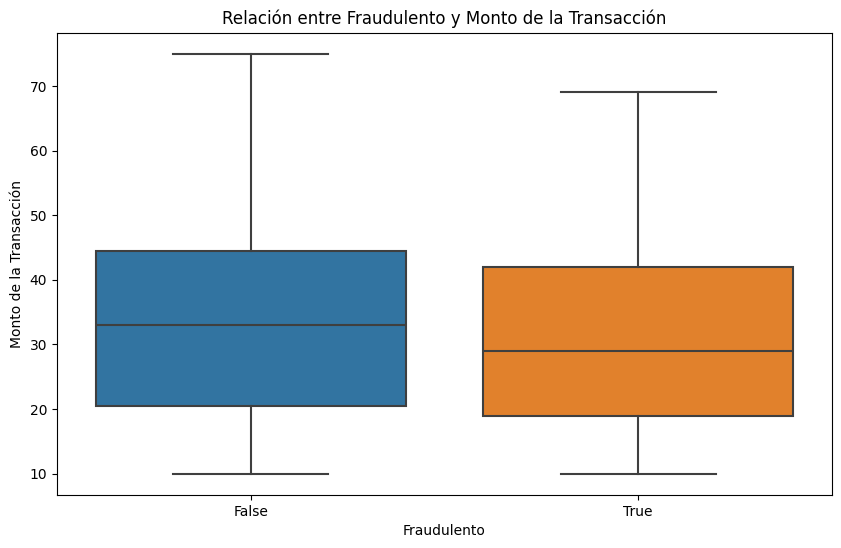

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fraudulent', y='transactionAmount')
plt.title('Relación entre Fraudulento y Monto de la Transacción')
plt.xlabel('Fraudulento')
plt.ylabel('Monto de la Transacción')
plt.show()


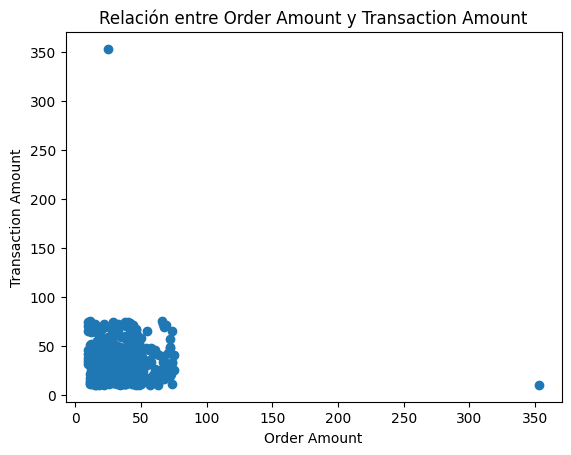

In [25]:
import  matplotlib.pyplot as plt

plt.scatter(data['orderAmount'], data['transactionAmount'])
plt.title('Relación entre Order Amount y Transaction Amount')
plt.xlabel('Order Amount')
plt.ylabel('Transaction Amount')
plt.show()

In [26]:
correlation_coefficient = data['orderAmount'].corr(data['transactionAmount'])
print(f'Coeficiente de Correlación: {correlation_coefficient}')

Coeficiente de Correlación: -0.07740750251294681


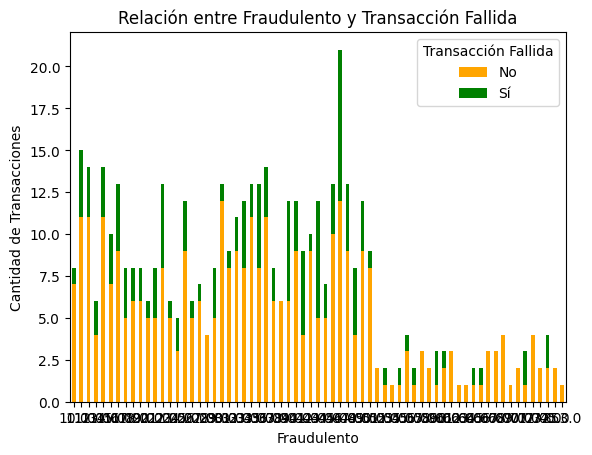

In [37]:
import pandas as pd 
contingency_table = pd.crosstab(data['orderAmount'], data['transactionFailed'])

# Crear un gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, color=['orange', 'green'])
plt.title('Relación entre Fraudulento y Transacción Fallida')
plt.xlabel('Fraudulento')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=0)
plt.legend(title='Transacción Fallida', labels=['No', 'Sí'])
plt.show()

In [28]:
stats = data[['orderAmount', 'transactionAmount']].describe()
print(stats)

       orderAmount  transactionAmount
count   478.000000         623.000000
mean     35.606695          34.598716
std      21.667298          20.360247
min      10.000000          10.000000
25%      22.000000          21.000000
50%      35.000000          34.000000
75%      46.000000          45.000000
max     353.000000         353.000000


In [29]:
 ##Promedio de todas las variables, por nuestra variable a predecir `transactionAmount`

## 3) Gráficos en AED
print(data.dtypes)


orderAmount                         float64
orderState                           object
paymentMethodRegistrationFailure     object
paymentMethodType                    object
paymentMethodProvider                object
paymentMethodIssuer                  object
transactionAmount                     int64
transactionFailed                      bool
fraudulent                           object
emailDomain                          object
emailProvider                        object
customerIPAddressSimplified          object
sameCity                             object
dtype: object


c:\Users\fedev\OneDrive\Escritorio\twting\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\fedev\OneDrive\Escritorio\twting\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\fedev\OneDrive\Escritorio\twting\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



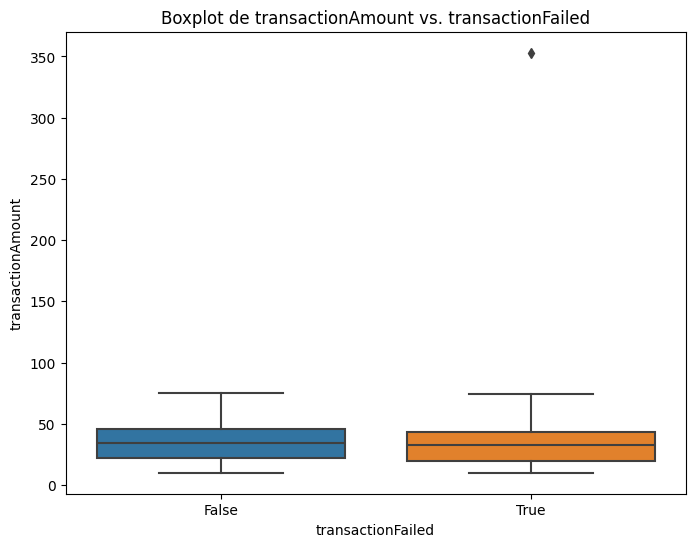

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='transactionFailed', y='transactionAmount', data=data)
plt.title('Boxplot de transactionAmount vs. transactionFailed')
plt.xlabel('transactionFailed')
plt.ylabel('transactionAmount')
plt.show()

Existe el valor atipico en True

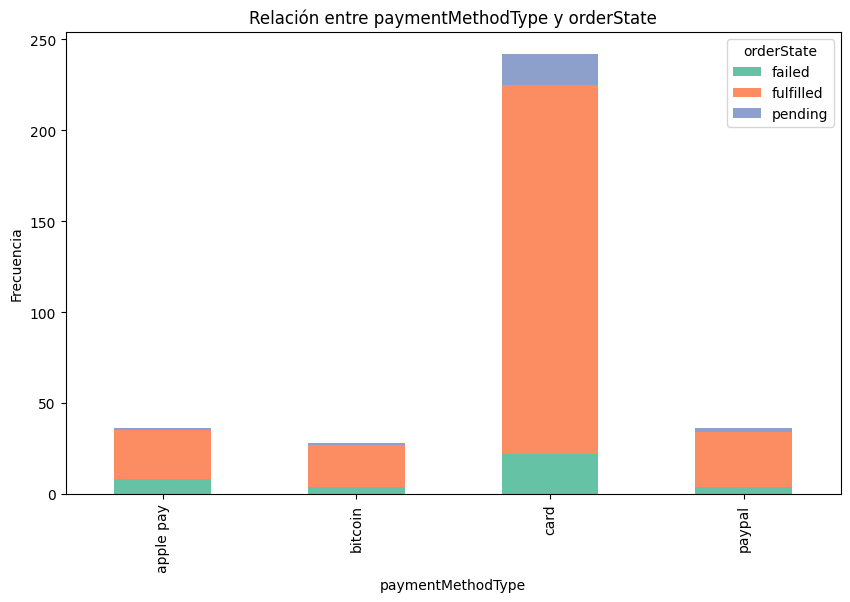

In [31]:
contingency_table = pd.crosstab(data['paymentMethodType'], data['orderState'])

custom_palette = sns.color_palette("Set2")  
sns.set_palette(custom_palette)

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre paymentMethodType y orderState')
plt.xlabel('paymentMethodType')
plt.ylabel('Frecuencia')
plt.legend(title='orderState', loc='upper right')
plt.show()

In [32]:
data_aux = data[["orderAmount", "transactionAmount"]].copy()
# Calcular el coeficiente de correlación de Pearson
correlation = data_aux['orderAmount'].corr(data_aux['transactionAmount'])
print(f"Coeficiente de Correlación de Pearson: {correlation}")


Coeficiente de Correlación de Pearson: -0.07740750251294681


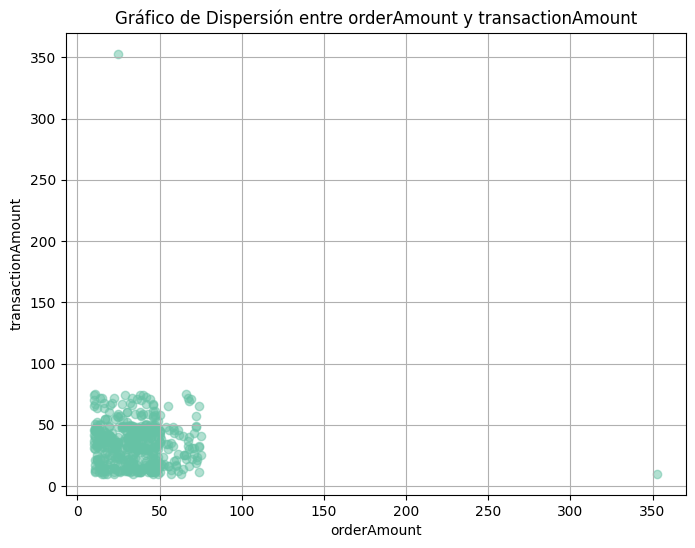

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(data_aux['orderAmount'], data_aux['transactionAmount'], alpha=0.5)
plt.title('Gráfico de Dispersión entre orderAmount y transactionAmount')
plt.xlabel('orderAmount')
plt.ylabel('transactionAmount')
plt.grid(True)
plt.show()

In [44]:
from  pandas_profiling import ProfileReport

C:\Users\fedev\AppData\Local\Temp\ipykernel_616\2762523821.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [39]:
!pip3 install ydata_profiling

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\fedev\\OneDrive\\Escritorio\\twting\\env\\Lib\\site-packages\\~andas.libs\\msvcp140-59fdf63e48138046aebeb6ddb5b4e960.dll'
Check the permissions.




  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/09/98/5a5fbfd48bf23acd3ceed5114d073b877965816304078151fefbf86d8458/ydata_profiling-4.5.1-py2.py3-none-any.whl.metadata
  Using cached ydata_profiling-4.5.1-py2.py3-none-any.whl.metadata (20 kB)
  Obtaining dependency information for pandas!=1.4.0,<2.1,>1.1 from https://files.pythonhosted.org/packages/9e/71/756a1be6bee0209d8c0d8c5e3b9fc72c00373f384a4017095ec404aec3ad/pandas-2.0.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.0.3-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp311-cp311-win_amd64.whl (663 kB)
  Obtaining dependency information for multimethod<2,>=1.4 from https://files.pythonhosted.org/packages/7f/bd/750245e47e7f307d9f94d4fa84727f4ed9956005dfa671d58be1d531a0f6/multimethod-1.10-py3-none-any.whl.metadata
  Using cached multimethod-1.10-py3-none-any.whl.metadata (8.2 kB)
  Using cache

In [42]:
from ydata_profiling import ProfileReport

Los insights que me llamaron la atencion fueron: 
1. Las tarjetas de credito tienen una alta capacidad de fallar y de cometer fraudes, ya que deduciendo tambien el modelo, si tiene muchos intentos fallidos, es un posible fraude o una alerta. 
2. Vemos que hay mas casos de no fraude que si, pero tambien hay que deducir que hay muchos casos en los que se comete fraude y es difcil de prevenir, viendo el grafico sobre cantidad de fraudes, no me parece  exacto
3. Tambien me llamo la atencion que: dependiendo la cantidad de pediciones a transacciones fallidas puede parecer anormal y generar una alerta.
4. 

In [34]:
# CORRELACIÓN 🤯

## 1) Samples
""""
Como tenemos pocas columnas / filas no es necesario tomar una muestra / sample del dataset completo.

## 5) Volvemos al análisis de correlación: Gráficos 📊

**Obtengan 5 insights que les llamo la atención del gráfico de correlación**

## 6) Análisis de correlaciones no lineales basadas en teoría de la información

Para MINE consideren:

```
# 2do calculo de los estadísticos
mine.compute_score(data3['transactionAmount'], data3['transactionFailed'])
"""

'"\nComo tenemos pocas columnas / filas no es necesario tomar una muestra / sample del dataset completo.\n\n## 5) Volvemos al análisis de correlación: Gráficos 📊\n\n**Obtengan 5 insights que les llamo la atención del gráfico de correlación**\n\n## 6) Análisis de correlaciones no lineales basadas en teoría de la información\n\nPara MINE consideren:\n\n```\n# 2do calculo de los estadísticos\nmine.compute_score(data3[\'transactionAmount\'], data3[\'transactionFailed\'])\n'

In [35]:
##NO ME CARGO PINEMY ASIQUE ADJUNTO LINK DE COLAB
'https://colab.research.google.com/drive/1C_ABloz7eP9Ri7r72iQFXFZAkEXcGWlb?usp=sharing'

'https://colab.research.google.com/drive/1C_ABloz7eP9Ri7r72iQFXFZAkEXcGWlb?usp=sharing'